In [163]:
#library required
import psycopg2

from sqlalchemy import create_engine
from sqlalchemy import text
import os
import time 
from datetime import datetime
import io 
import sys
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


conn = psycopg2.connect(
    host="mensa-datawarehouse.cibzivktatsb.ap-south-1.redshift.amazonaws.com",
    database="mensa_db_prod",
    port=5439,
#     user='mensa_db_prod_rw',
#     password='MensaProdRW345',
#     user="mensa_db_prod_pbi_ro",
#     password="URg3YcpXdmUZapJkufZK",
    user="sudhakar@mensabrands.com",
    password="MensaBrands345",
)

cur = conn.cursor()

# SQL query: To get base data SQL query

sql = f"""
select * from reporting.demand_planning_base
;
"""


# Execute the generated SQL
cur.execute(sql)
results = cur.fetchall()

# Close the cursor and connection
cur.close()
conn.close()
print("SQL Query executed successfully.")

# Fetch column names
colnames = [desc[0] for desc in cur.description]

# Load results into a pandas DataFrame
df = pd.DataFrame(results, columns=colnames)

# Save the DataFrame to a CSV file
# Define the date string
date_str = '13_08_24'
df.to_csv('C:/Users/Poovesh Kumar M/Downloads/Planning/Planning_base_snapshot_' + date_str + '.csv', index=False)


In [27]:

# Define the file path
file_path = r"C:\Users\Poovesh Kumar M\Downloads\Planning\demand_planning_base_13_08_2024.csv"

# Read the CSV file into a DataFrame
df_base = pd.read_csv(file_path)

# Display the DataFrame
print(df_base)


                 brand sales_channel  sales_date sale_month_year        asin  \
0           folkulture    Amazon.com  2022-04-01         04-2022  B01N0GRR2S   
1           folkulture    Amazon.com  2022-04-01         04-2022  B01NBEW1Y5   
2           folkulture    Amazon.com  2022-04-01         04-2022  B01NBPQUCB   
3           folkulture    Amazon.com  2022-04-01         04-2022  B06Y3GB2XP   
4           folkulture    Amazon.com  2022-04-01         04-2022  B072JFJ6X4   
...                ...           ...         ...             ...         ...   
6827609  majestic pure    Amazon.com  2024-07-31         07-2024  B0CXDRY3WC   
6827610  majestic pure    Amazon.com  2024-07-31         07-2024  B0CXDSCVJB   
6827611  majestic pure    Amazon.com  2024-07-31         07-2024  B0CZT1HV3L   
6827612  majestic pure    Amazon.com  2024-07-31         07-2024  B0D4VHWB3C   
6827613  majestic pure    Amazon.com  2024-07-31         07-2024  B0D7HZR4XL   

        earliest_date_brand_channel ear

In [160]:
#rows_count 
# df_base1 = df_base[df_base['inventory_available'] > 0]

# Group by 'brand' and 'sales_channel' and count occurrences
grouped_counts = df_base1.groupby(['brand', 'sales_channel']).count()

# Display the resulting DataFrame
print(grouped_counts)


                              sales_date  sale_month_year     asin  \
brand          sales_channel                                         
botanic hearth Amazon.ca           13893            13893    13893   
               Amazon.com          35473            35473    35473   
folkulture     Amazon.ca           97980            97980    97980   
               Amazon.com         513813           513813   513813   
katchon        Amazon.ca          193408           193408   193408   
               Amazon.com        1800135          1800135  1800135   
majestic pure  Amazon.ca           20965            20965    20965   
               Amazon.com          87632            87632    87632   

                              earliest_date_brand_channel  earliest_date  \
brand          sales_channel                                               
botanic hearth Amazon.ca                            13893          13893   
               Amazon.com                           35473          3547

In [161]:
# Group by 'brand' and 'sales_channel' and count occurrences
grouped_counts = df_base1.groupby(['brand', 'sales_channel']).size()

# Display the resulting Series
print(grouped_counts)


brand           sales_channel
botanic hearth  Amazon.ca          13893
                Amazon.com         35473
folkulture      Amazon.ca          97980
                Amazon.com        513813
katchon         Amazon.ca         193408
                Amazon.com       1800135
majestic pure   Amazon.ca          20965
                Amazon.com         87632
dtype: int64


In [162]:
# Group by 'brand' and 'sales_channel' and count occurrences
grouped_counts = df_base.groupby(['brand', 'sales_channel']).size()

# Display the resulting Series
print(grouped_counts)


brand           sales_channel
botanic hearth  Amazon.ca          17244
                Amazon.com         70781
folkulture      Amazon.ca         327736
                Amazon.com       1421916
katchon         Amazon.ca         496005
                Amazon.com       4269572
majestic pure   Amazon.ca          27414
                Amazon.com        196946
dtype: int64


In [29]:
#Understanding imported data frame
# Display DataFrame shape
print("Shape of the DataFrame:")
print(df_base.shape)
print("\n")

# Display the first 10 rows
print("First 10 rows of the DataFrame:")
print(df_base.head(10))
print("\n")

# Display data types of each column
print("Data types of each column:")
print(df_base.dtypes)
print("\n")

# Display information about the DataFrame
print("DataFrame information:")
df_base.info()
print("\n")

# Display summary statistics
print("Summary statistics of the DataFrame:")
print(df_base.describe())
print("\n")

# Display the number of missing values in each column
print("Missing values in each column:")
print(df_base.isnull().sum())
print("\n")

# Display the number of unique values in each column
print("Number of unique values in each column:")
print(df_base.nunique())


Shape of the DataFrame:
(6827614, 16)


First 10 rows of the DataFrame:
        brand sales_channel  sales_date sale_month_year        asin  \
0  folkulture    Amazon.com  2022-04-01         04-2022  B01N0GRR2S   
1  folkulture    Amazon.com  2022-04-01         04-2022  B01NBEW1Y5   
2  folkulture    Amazon.com  2022-04-01         04-2022  B01NBPQUCB   
3  folkulture    Amazon.com  2022-04-01         04-2022  B06Y3GB2XP   
4  folkulture    Amazon.com  2022-04-01         04-2022  B072JFJ6X4   
5  folkulture    Amazon.com  2022-04-01         04-2022  B072JYDYBY   
6  folkulture    Amazon.com  2022-04-01         04-2022  B073QW2NLV   
7  folkulture    Amazon.com  2022-04-01         04-2022  B073QWC8GH   
8  folkulture    Amazon.com  2022-04-01         04-2022  B075JJX4FQ   
9  folkulture    Amazon.com  2022-04-01         04-2022  B077S5PV2C   

  earliest_date_brand_channel earliest_date currency  asp  gmv_units  gmv  \
0                  2022-04-01    2022-04-01      USD  0.0          0 

In [30]:

# 2. Filter (df2): brand x channel level into individual dataframes
df_ka_us = df_base[(df_base['brand'] == 'katchon') & (df_base['sales_channel'] == 'Amazon.com')]
df_ka_ca = df_base[(df_base['brand'] == 'katchon') & (df_base['sales_channel'] == 'Amazon.ca')]
df_bh_us = df_base[(df_base['brand'] == 'botanic hearth') & (df_base['sales_channel'] == 'Amazon.com')]
df_bh_ca = df_base[(df_base['brand'] == 'botanic hearth') & (df_base['sales_channel'] == 'Amazon.ca')]
df_mp_us = df_base[(df_base['brand'] == 'majestic pure') & (df_base['sales_channel'] == 'Amazon.com')]
df_mp_ca = df_base[(df_base['brand'] == 'majestic pure') & (df_base['sales_channel'] == 'Amazon.ca')]
df_fk_us = df_base[(df_base['brand'] == 'folkulture') & (df_base['sales_channel'] == 'Amazon.com')]
df_fk_ca = df_base[(df_base['brand'] == 'folkulture') & (df_base['sales_channel'] == 'Amazon.ca')]


In [32]:
# Save the brand x sales channel DataFrame to an csv file
date_str = '13_08_24'
df_ka_us.to_csv('C:/Users/Poovesh Kumar M/Downloads/Planning/1_Data/df_katchon_us_' + date_str + '.csv', index=False)
df_ka_ca.to_csv('C:/Users/Poovesh Kumar M/Downloads/Planning/1_Data/df_katchon_ca_' + date_str + '.csv', index=False)
df_bh_us.to_csv('C:/Users/Poovesh Kumar M/Downloads/Planning/1_Data/df_bh_us_' + date_str + '.csv', index=False)
df_bh_ca.to_csv('C:/Users/Poovesh Kumar M/Downloads/Planning/1_Data/df_bh_ca_' + date_str + '.csv', index=False)
df_mp_us.to_csv('C:/Users/Poovesh Kumar M/Downloads/Planning/1_Data/df_mp_us_' + date_str + '.csv', index=False)
df_mp_ca.to_csv('C:/Users/Poovesh Kumar M/Downloads/Planning/1_Data/df_mp_ca_' + date_str + '.csv', index=False)
df_fk_us.to_csv('C:/Users/Poovesh Kumar M/Downloads/Planning/1_Data/df_fk_us_' + date_str + '.csv', index=False)
df_fk_ca.to_csv('C:/Users/Poovesh Kumar M/Downloads/Planning/1_Data/df_fk_ca_' + date_str + '.csv', index=False)


In [165]:
# Read the CSV file into a DataFrame

df_ka_us = pd.read_csv("C:/Users/Poovesh Kumar M/Downloads/Planning/1_Data/df_katchon_us_13_08_24.csv")
df_ka_ca = pd.read_csv("C:/Users/Poovesh Kumar M/Downloads/Planning/1_Data/df_katchon_ca_13_08_24.csv")
df_bh_us = pd.read_csv("C:/Users/Poovesh Kumar M/Downloads/Planning/1_Data/df_bh_us_13_08_24.csv")
df_bh_ca = pd.read_csv("C:/Users/Poovesh Kumar M/Downloads/Planning/1_Data/df_bh_ca_13_08_24.csv")
df_mp_us = pd.read_csv("C:/Users/Poovesh Kumar M/Downloads/Planning/1_Data/df_mp_us_13_08_24.csv")
df_mp_ca = pd.read_csv("C:/Users/Poovesh Kumar M/Downloads/Planning/1_Data/df_mp_ca_13_08_24.csv")
df_fk_us = pd.read_csv("C:/Users/Poovesh Kumar M/Downloads/Planning/1_Data/df_fk_us_13_08_24.csv")
df_fk_ca = pd.read_csv("C:/Users/Poovesh Kumar M/Downloads/Planning/1_Data/df_fk_ca_13_08_24.csv")

In [273]:
# Filter rows where 'inventory_available' is greater than 0
df_bs1 = df_bh_ca[df_bh_ca['inventory_available'] > 0]
df_bs = df_bs1

# Display the first few rows of the filtered DataFrame
print(df_bs.head())

# Step 2: Create a list of distinct 'brand' and 'sales_channel' combinations
brands_channel_list = [f"{brand.replace('.', '_')}_{channel.replace('.', '_')}" 
                       for brand, channel in df_bs[['brand', 'sales_channel']].drop_duplicates().values]

# Step 3: Convert the list to a single string, separated by commas
brands_channel_str = ', '.join(brands_channel_list)

# Display the combined string
print(brands_channel_str)


            brand sales_channel  sales_date sale_month_year        asin  \
1  botanic hearth     Amazon.ca  2023-05-01         05-2023  B07RHWJW98   
2  botanic hearth     Amazon.ca  2023-05-01         05-2023  B09BP297TJ   
3  botanic hearth     Amazon.ca  2023-05-01         05-2023  B09C2QNHS4   
4  botanic hearth     Amazon.ca  2023-05-01         05-2023  B09Q5L8BBF   
6  botanic hearth     Amazon.ca  2023-05-02         05-2023  B087CY8B2R   

  earliest_date_brand_channel earliest_date currency     asp  gmv_units  \
1                  2023-05-01    2023-05-01      CAD   0.000          0   
2                  2023-05-01    2023-05-01      CAD  25.950          3   
3                  2023-05-01    2023-05-01      CAD  33.038          5   
4                  2023-05-01    2023-05-01      CAD  36.420          5   
6                  2023-05-01    2023-05-02      CAD  19.990          1   

      gmv  ad_spend  inventory_available                     category  \
1    0.00      0.00      

In [274]:

# Check the data type of brands_channel_str
print(type(brands_channel_str))



<class 'str'>


#Understanding imported data frame
# Display DataFrame shape
print("Shape of the DataFrame:")
print(df_ka_us1.shape)
print("\n")

# Display the first 10 rows
print("First 10 rows of the DataFrame:")
print(df_ka_us1.head(10))
print("\n")

# Display data types of each column
print("Data types of each column:")
print(df_ka_us1.dtypes)
print("\n")

# Display information about the DataFrame
print("DataFrame information:")
df_ka_us.info()
print("\n")

# Display summary statistics
print("Summary statistics of the DataFrame:")
print(df_ka_us1.describe())
print("\n")

# Display the number of missing values in each column
print("Missing values in each column:")
print(df_ka_us1.isnull().sum())
print("\n")

# Display the number of unique values in each column
print("Number of unique values in each column:")
print(df_ka_us1.nunique())


# Group by 'category' and 'sale_month_year' and then aggregate 'gmv_units' by sum
df_ka_us1_grouped = df_ka_us1.groupby(['category', 'sale_month_year']).agg({'gmv_units': 'sum'})

# Display the first few rows of the grouped DataFrame
# print(df_ka_us1_grouped.head())
df_ka_us1_grouped

df_ka_us1.groupby('category').describe()

In [275]:
#Summarize & Plot GMV Units at Category Level Month-wise

# Summarize GMV Units at Category Level Month-wise
category_sales = df_bs.groupby(['sale_month_year', 'category'])['gmv_units'].sum().reset_index()

# Convert sale_month_year to a datetime object for proper sorting
category_sales['sale_month_year'] = pd.to_datetime(category_sales['sale_month_year'], format='%m-%Y')

# Sort the data by month-year
category_sales = category_sales.sort_values(by=['sale_month_year'])



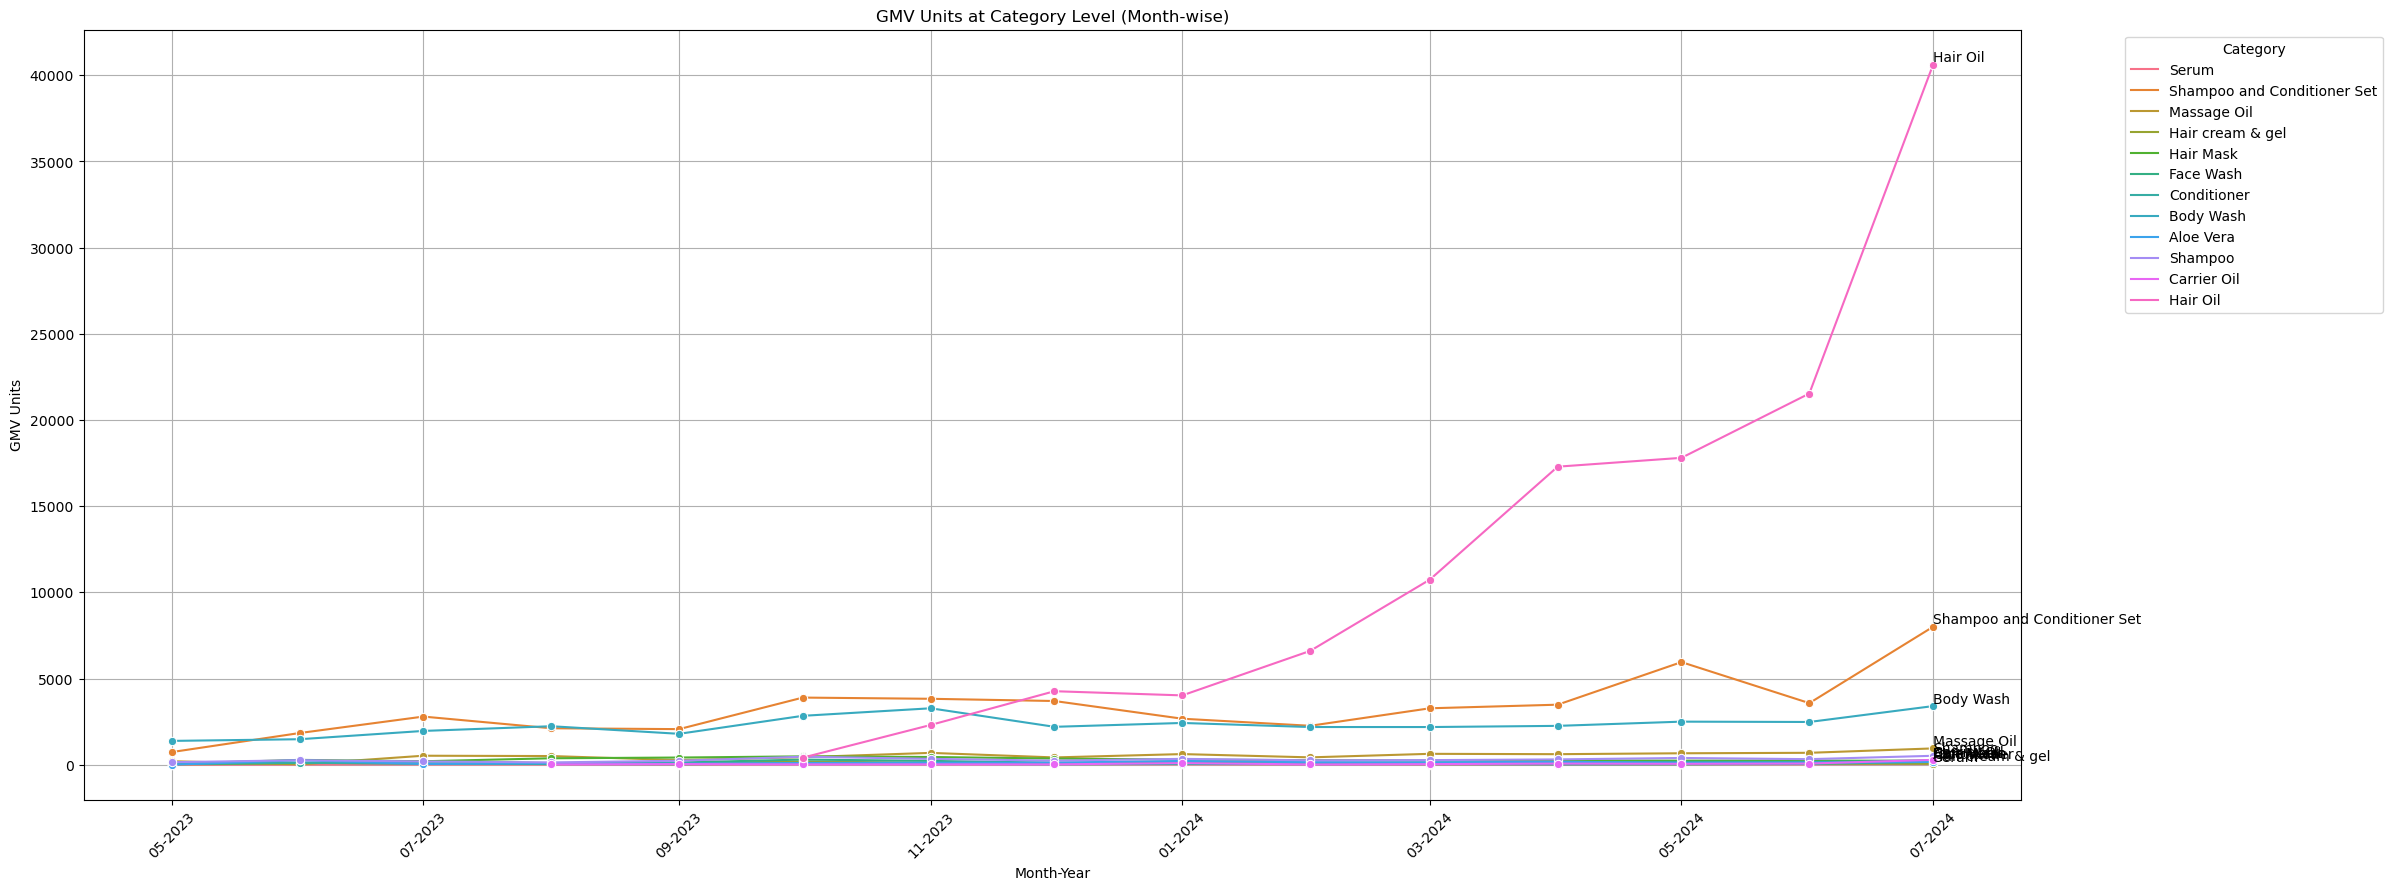

In [276]:
# Create the plot
plt.figure(figsize=(25, 10))

# Create a lineplot
ax = sns.lineplot(data=category_sales, x='sale_month_year', y='gmv_units', hue='category', marker='o')

# Add labels directly to the lines
# Extract the unique categories
categories = category_sales['category'].unique()
for category in categories:
    # Filter data for the current category
    category_data = category_sales[category_sales['category'] == category]
    
    # Get the last point of the line for labeling
    last_point = category_data.iloc[-1]
    x = last_point['sale_month_year']
    y = last_point['gmv_units']
    
    # Add text label for the line
    plt.text(x, y, category, fontsize=10, ha='left', va='bottom')

# Title and labels
plt.title('GMV Units at Category Level (Month-wise)')
plt.xlabel('Month-Year')
plt.ylabel('GMV Units')
plt.xticks(rotation=45)

# Format x-axis labels to display as mm-yyyy
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%Y'))

# Add legend to indicate colors and lines
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')

# Grid
plt.grid(True)

# Save the plot as an image file
plt.savefig('gmv_units_category_monthwise_labeled.png', format='png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()


In [277]:
# Finding the Category Contributing Most to Sales
# Category Contribution to Sales
category_contribution = df_bs.groupby('category')['gmv_units'].sum().reset_index()
category_contribution = category_contribution.sort_values(by='gmv_units', ascending=False)

# Display the category with the highest sales
top_category = category_contribution.iloc[0]
print(f"Top Category: {top_category['category']} with GMV Units: {top_category['gmv_units']}")


Top Category: Hair Oil with GMV Units: 125598


In [278]:
# Finding the Category Contributing Most to Sales
# Step 1: Convert sale_month_year to datetime format
df_bs['sale_month_year'] = pd.to_datetime(df_bs['sale_month_year'], format='%m-%Y')

# Step 2: Create df1: Categories in descending order of GMV Units
category_contribution1 = df_bs.groupby('category')['gmv_units'].sum().reset_index()
category_contribution1 = category_contribution.sort_values(by='gmv_units', ascending=False)

category_contribution1.to_csv(f'C:/Users/Poovesh Kumar M/Downloads/Planning/1_category_contribution_'+brands_channel_str+'.csv', index=False)


# Step 3: Create df2: Pivot table with ordered columns
df2 = df_bs.pivot_table(index='category', columns='sale_month_year', values='gmv_units', aggfunc='sum', fill_value=0)

# Ensure columns are ordered by date
df2 = df2.sort_index(axis=1)

df2.to_csv('C:/Users/Poovesh Kumar M/Downloads/Planning/2_category_contribution_sale_month_year_'+brands_channel_str+'.csv')

# Display df1 and df2
print("DataFrame df1:")
print(category_contribution1)

print("\nDataFrame df2:")
print(df2)


DataFrame df1:
                       category  gmv_units
6                      Hair Oil     125598
11  Shampoo and Conditioner Set      50189
1                     Body Wash      34602
8                   Massage Oil       7666
10                      Shampoo       4425
5                     Hair Mask       4388
4                     Face Wash       2095
0                     Aloe Vera       1911
7              Hair cream & gel       1266
3                   Conditioner        845
2                   Carrier Oil        749
9                         Serum        250

DataFrame df2:
sale_month_year              2023-05-01  2023-06-01  2023-07-01  2023-08-01  \
category                                                                      
Aloe Vera                             3         263          47          88   
Body Wash                          1383        1480        1961        2234   
Carrier Oil                           0           0           0          20   
Conditioner    

C:\Users\Poovesh Kumar M\AppData\Local\Temp\ipykernel_21496\4159057544.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bs['sale_month_year'] = pd.to_datetime(df_bs['sale_month_year'], format='%m-%Y')


import matplotlib.pyplot as plt
import seaborn as sns

# Create a boxplot of gmv_units by asin
plt.figure(figsize=(15, 10))
sns.boxplot(data=df_ka_us1, x='asin', y='gmv_units')
plt.xticks(rotation=90)
plt.title('Boxplot of GMV Units by ASIN')
plt.xlabel('ASIN')
plt.ylabel('GMV Units')
plt.grid(True)
plt.show()


In [279]:

# Filter rows where inventory_available > 0 and gmv_units > 1
df_filtered = df_bs[(df_bs['gmv_units'] > 1)]

# Sort by gmv_units in descending order
sorted_df = df_filtered.sort_values(by='gmv_units', ascending=False)

# Calculate the number of ASINs for each category
total_asins = len(sorted_df)
top_10_percent = total_asins // 10
bottom_10_percent = total_asins // 10

# Initialize empty lists to store the results
category_list = []
asin_list = []
gmv_units_list = []

# Ensure at least 10 ASINs for each category
if total_asins > 10:
    # High Selling ASINs (Top 10%)
    high_selling_df = sorted_df.head(top_10_percent).head(10)
    category_list.extend(['High Selling'] * len(high_selling_df))
    asin_list.extend(high_selling_df['asin'])
    gmv_units_list.extend(high_selling_df['gmv_units'])

    # Medium Selling ASINs (Middle 80%)
    medium_selling_df = sorted_df.iloc[top_10_percent: -bottom_10_percent].head(10)
    category_list.extend(['Medium Selling'] * len(medium_selling_df))
    asin_list.extend(medium_selling_df['asin'])
    gmv_units_list.extend(medium_selling_df['gmv_units'])

    # Low Selling ASINs (Bottom 10%)
    low_selling_df = sorted_df.tail(bottom_10_percent).head(10)
    category_list.extend(['Low Selling'] * len(low_selling_df))
    asin_list.extend(low_selling_df['asin'])
    gmv_units_list.extend(low_selling_df['gmv_units'])

    # Create the output DataFrame
    result_df = pd.DataFrame({
        'Category': category_list,
        'ASIN': asin_list,
        'GMV Units': gmv_units_list
    })

    print(result_df)
else:
    print("Not enough ASINs to categorize.")

result_df.to_csv('C:/Users/Poovesh Kumar M/Downloads/Planning/3_ASIN_categorize_'+brands_channel_str+'.csv', index=False)

          Category        ASIN  GMV Units
0     High Selling  B0C6XJMSGP       7673
1     High Selling  B0C6XJMSGP       6620
2     High Selling  B07P547Z3F       2122
3     High Selling  B07P547Z3F       1537
4     High Selling  B0C6XJMSGP        881
5     High Selling  B0C6XJMSGP        806
6     High Selling  B0C6XJMSGP        754
7     High Selling  B0C6XJMSGP        732
8     High Selling  B0C6XJMSGP        722
9     High Selling  B0C6XJMSGP        701
10  Medium Selling  B07HHHMJ6V         37
11  Medium Selling  B0CKDY6BMP         37
12  Medium Selling  B07P547Z3F         37
13  Medium Selling  B0C6XPCYGY         37
14  Medium Selling  B0C6XPCYGY         37
15  Medium Selling  B07HHHMJ6V         37
16  Medium Selling  B0C6XXXL38         37
17  Medium Selling  B07P547Z3F         37
18  Medium Selling  B0CKDY6BMP         37
19  Medium Selling  B0C6XVNS55         37
20     Low Selling  B07XCJSYRT          2
21     Low Selling  B0CKDYC9JF          2
22     Low Selling  B09KP3D68B    

#Find Correlation & Plot Between GMV Units and Other Variables
# Calculate Correlation
correlation_data = df_ka_us1[['gmv_units', 'asp', 'inventory_available', 'ad_spend']].corr()

# Display the correlation matrix
print("Correlation Matrix:\n", correlation_data)


Correlation Matrix:
                      gmv_units       asp  inventory_available  ad_spend
gmv_units             1.000000  0.011871             0.422352  0.647443
asp                   0.011871  1.000000             0.162138  0.148692
inventory_available   0.422352  0.162138             1.000000  0.465154
ad_spend              0.647443  0.148692             0.465154  1.000000


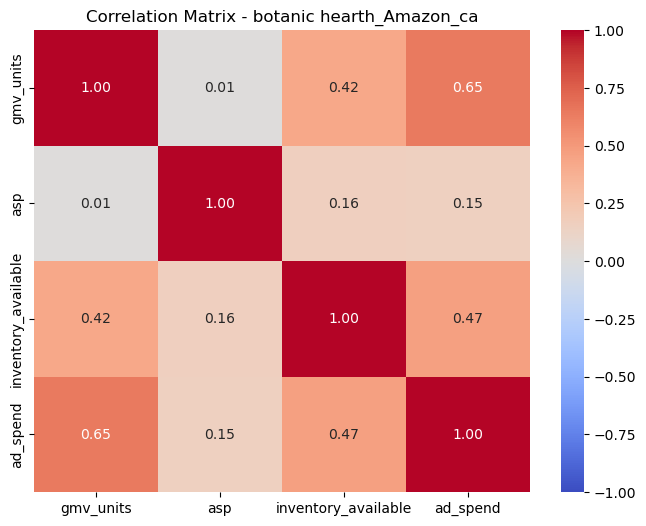

In [280]:
# Calculate Correlation overall
correlation_data = df_bs[['gmv_units', 'asp', 'inventory_available', 'ad_spend']].corr()

correlation_data.to_csv('C:/Users/Poovesh Kumar M/Downloads/Planning/4_Correlation_Matrix_overall '+brands_channel_str+'.csv')

# Display the correlation matrix
print("Correlation Matrix:\n", correlation_data)

# Create a heatmap of the correlation matrix
plt.figure(figsize=(8, 6))  # Adjust the size as needed
sns.heatmap(correlation_data, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1, center=0)
plt.title('Correlation Matrix - '+brands_channel_str)
plt.show()



Correlation Matrix:
                      gmv_units       asp  inventory_available  ad_spend
gmv_units             1.000000  0.126399             0.497853  0.739386
asp                   0.126399  1.000000             0.195611  0.240643
inventory_available   0.497853  0.195611             1.000000  0.595494
ad_spend              0.739386  0.240643             0.595494  1.000000


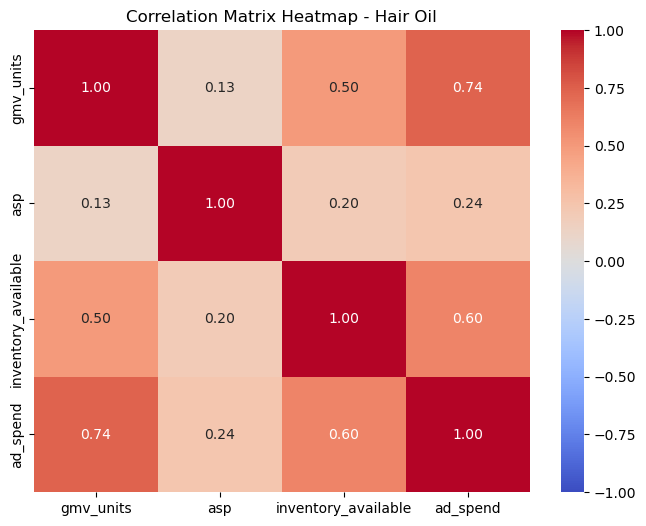

In [281]:
# Calculate Correlation for specific category

# Define the item to filter by
items = 'Hair Oil'

# Filter the DataFrame for the specific category
df_crr1 = df_bs[df_bs['category'].str.contains(items, na=False)]

# Calculate the correlation matrix
correlation_data = df_crr1[['gmv_units', 'asp', 'inventory_available', 'ad_spend']].corr()

# Save the correlation matrix to a CSV file
csv_filename = f'C:/Users/Poovesh Kumar M/Downloads/Planning/5_Correlation_Matrix_{items}.csv'
correlation_data.to_csv(csv_filename, index=True)

# Display the correlation matrix
print("Correlation Matrix:\n", correlation_data)

# Create a heatmap of the correlation matrix
plt.figure(figsize=(8, 6))  # Adjust the size as needed
sns.heatmap(correlation_data, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1, center=0)
plt.title(f'Correlation Matrix Heatmap - {items}')
plt.show()



Correlation Matrix:
                      gmv_units       asp  inventory_available  ad_spend
gmv_units             1.000000  0.245849             0.188560  0.298251
asp                   0.245849  1.000000             0.438163  0.211043
inventory_available   0.188560  0.438163             1.000000  0.607445
ad_spend              0.298251  0.211043             0.607445  1.000000


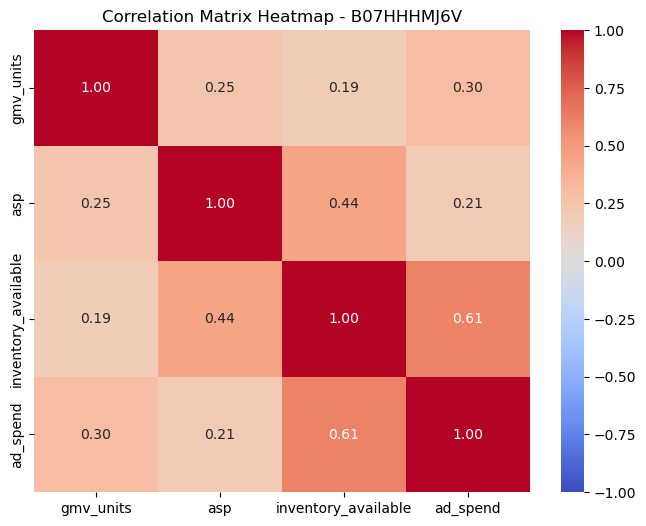

In [284]:
# Calculate Correlation for specific asin

# Define the item to filter by
items = 'B07HHHMJ6V'

# Filter the DataFrame for the specific category
df_crr2 = df_bs[df_bs['asin'].str.contains(items, na=False)]

# Calculate the correlation matrix
correlation_data = df_crr2[['gmv_units', 'asp', 'inventory_available', 'ad_spend']].corr()

# Save the correlation matrix to a CSV file
csv_filename = f'C:/Users/Poovesh Kumar M/Downloads/Planning/6_Correlation_Matrix_{items}.csv'
correlation_data.to_csv(csv_filename, index=True)

# Display the correlation matrix
print("Correlation Matrix:\n", correlation_data)

# Create a heatmap of the correlation matrix
plt.figure(figsize=(8, 6))  # Adjust the size as needed
sns.heatmap(correlation_data, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1, center=0)
plt.title(f'Correlation Matrix Heatmap - {items}')
plt.show()


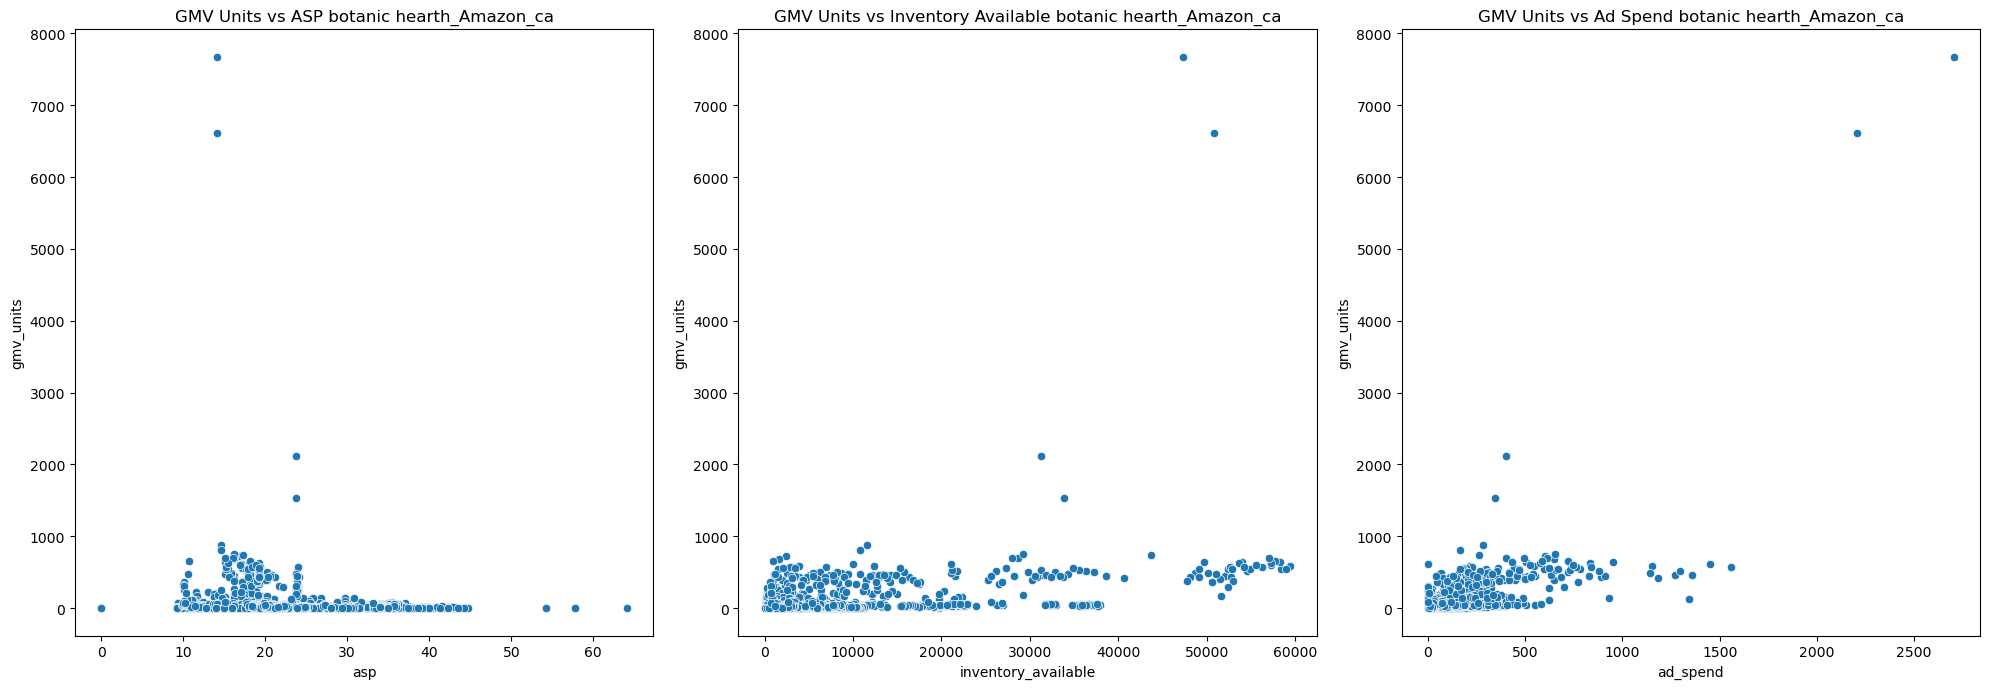

In [285]:
#  Plotting the Correlation
# Plotting Correlation between GMV Units & Other Variables


plt.figure(figsize=(20, 7))

# GMV Units vs ASP
plt.subplot(1, 3, 1)
sns.scatterplot(x='asp', y='gmv_units', data=df_bs)
plt.title('GMV Units vs ASP '+brands_channel_str)

# GMV Units vs Inventory Available
plt.subplot(1, 3, 2)
sns.scatterplot(x='inventory_available', y='gmv_units', data=df_bs)
plt.title('GMV Units vs Inventory Available '+brands_channel_str)

# GMV Units vs Ad Spend
plt.subplot(1, 3, 3)
sns.scatterplot(x='ad_spend', y='gmv_units', data=df_bs)
plt.title('GMV Units vs Ad Spend '+brands_channel_str)

plt.tight_layout()
plt.show()


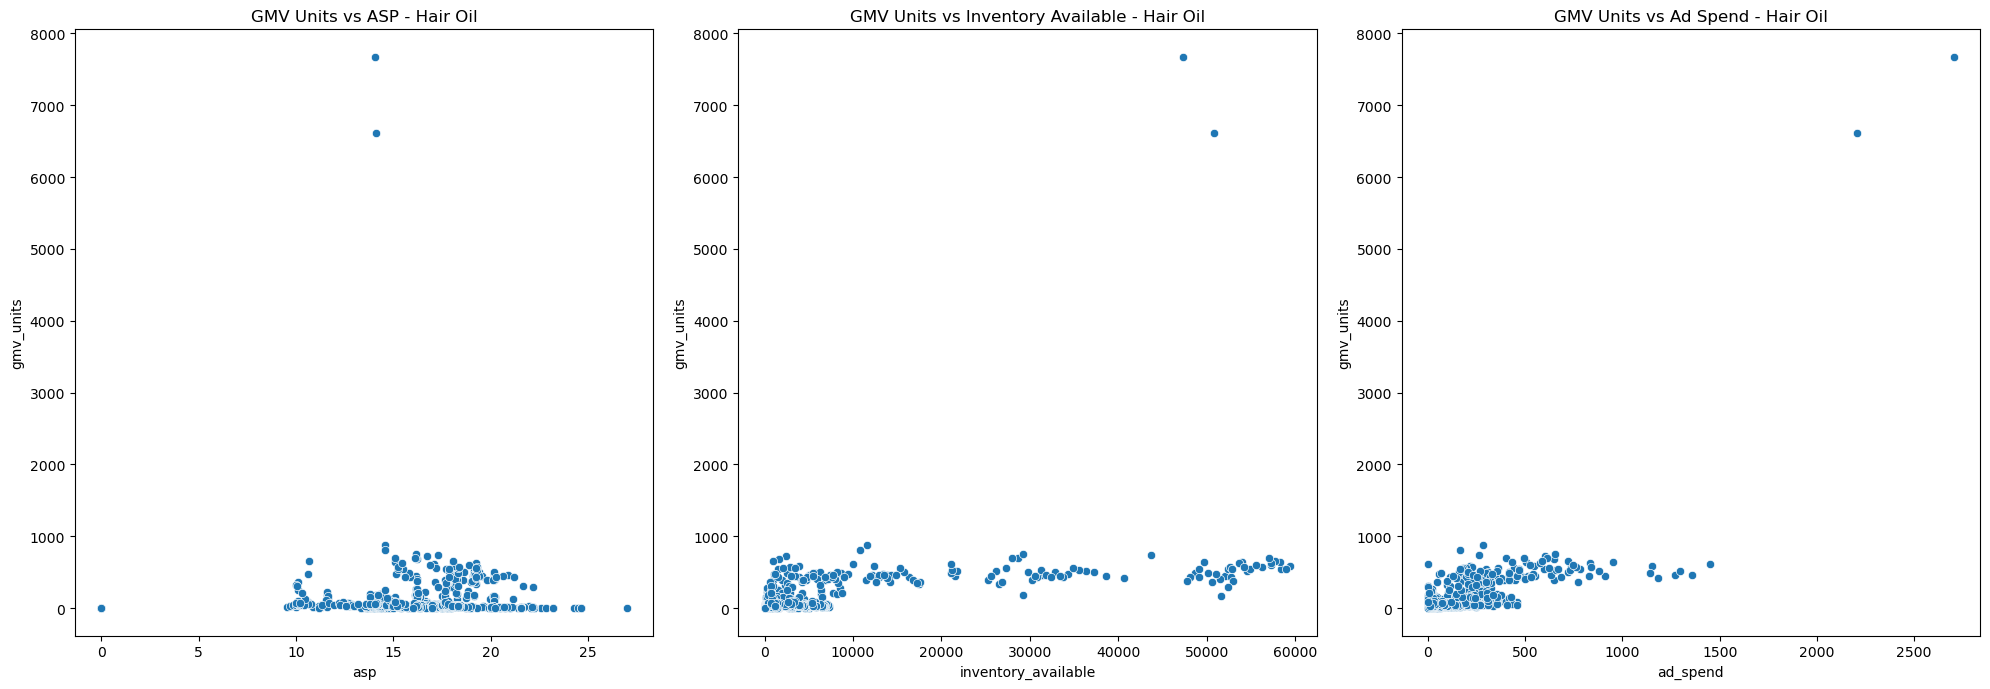

In [286]:
#  Plotting the Correlation - category
# Plotting Correlation between GMV Units & Other Variables

# Define the item to filter by
items = 'Hair Oil'

# Filter the DataFrame for the specific ASIN
df_pp_2 = df_bs[df_bs['category'].str.contains(items, na=False)]

plt.figure(figsize=(20, 7))

# GMV Units vs ASP
plt.subplot(1, 3, 1)
sns.scatterplot(x='asp', y='gmv_units', data=df_pp_2)
plt.title(f'GMV Units vs ASP - {items}')

# GMV Units vs Inventory Available
plt.subplot(1, 3, 2)
sns.scatterplot(x='inventory_available', y='gmv_units', data=df_pp_2)
plt.title(f'GMV Units vs Inventory Available - {items}')

# GMV Units vs Ad Spend
plt.subplot(1, 3, 3)
sns.scatterplot(x='ad_spend', y='gmv_units', data=df_pp_2)
plt.title(f'GMV Units vs Ad Spend - {items}')

plt.tight_layout()
plt.show()

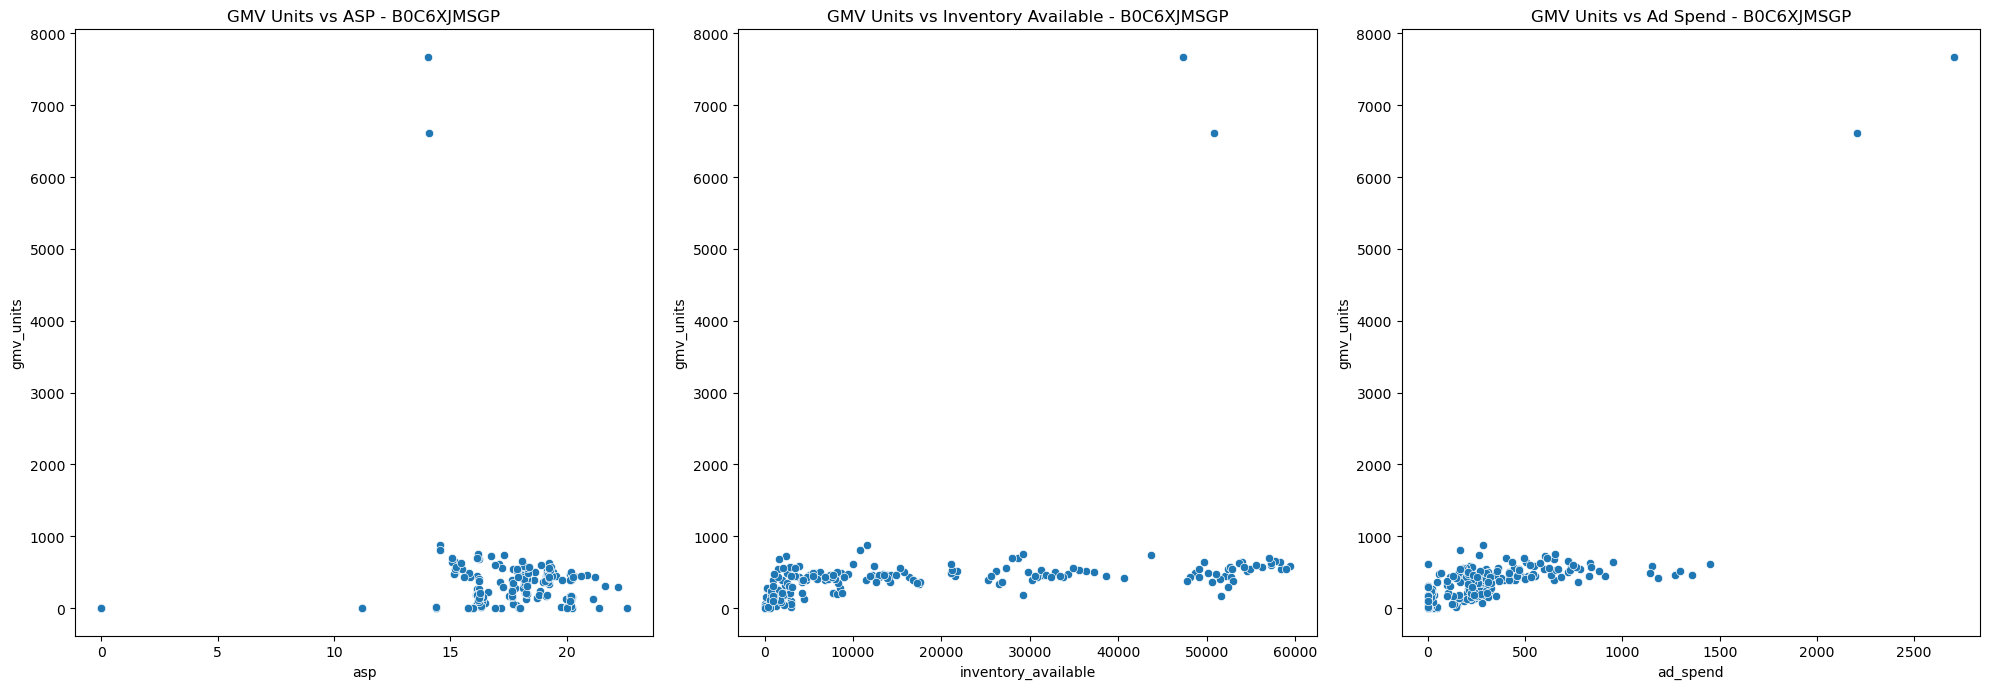

In [287]:
#  Plotting the Correlation -ASIN
# Plotting Correlation between GMV Units & Other Variables

# Define the item to filter by
items = 'B0C6XJMSGP'

# Filter the DataFrame for the specific ASIN
df_pp_3 = df_bs[df_bs['asin'].str.contains(items, na=False)]

plt.figure(figsize=(20, 7))

# GMV Units vs ASP
plt.subplot(1, 3, 1)
sns.scatterplot(x='asp', y='gmv_units', data=df_pp_3)
plt.title(f'GMV Units vs ASP - {items}')

# GMV Units vs Inventory Available
plt.subplot(1, 3, 2)
sns.scatterplot(x='inventory_available', y='gmv_units', data=df_pp_3)
plt.title(f'GMV Units vs Inventory Available - {items}')

# GMV Units vs Ad Spend
plt.subplot(1, 3, 3)
sns.scatterplot(x='ad_spend', y='gmv_units', data=df_pp_3)
plt.title(f'GMV Units vs Ad Spend - {items}')

plt.tight_layout()
plt.show()